## Cosine Similarity Calculations
Cosine similarity is a measure of similarity between two non-zero vectors of an inner product space that measures the cosine of the angle between them. Similarity measures have a multiude of uses in machine learning projects; they come in handy when matching strings, measuring distance, and extracting features. This similarity measurement is particularly concerned with orientation, rather than magnitude. 
In this case study, you'll use the cosine similarity to compare both a numeric data within a plane and a text dataset for string matching.

Loading the Python modules, including cosine_similarity, from sklearn.metrics.pairwise

In [27]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline
plt.style.use('ggplot')
from scipy import spatial
from sklearn.metrics.pairwise import cosine_similarity
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

from IPython.core.display import display, HTML
import seaborn as sns

In [12]:
os.chdir(r"C:\\Users\\moham\\OneDrive\\Desktop\\Other\\Bootcamp\\ML\\Notebooks\\UnsupervisedLearning\\CosineSimilarity\\1585686145_CosineSimilarityCaseStudy\\CosineSimilarityCaseStudy")

In [13]:
df = pd.read_csv('distance_dataset (1).csv')
df.shape

(2000, 5)

In [14]:
df.head()

,Unnamed: 0,X,Y,Z,ClusterID
0,0,5.135779,4.167542,5.787635,4
1,1,4.280721,5.770909,6.091044,4
2,2,8.329098,7.540436,3.247239,2
3,3,5.470224,5.069249,5.768313,4
4,4,2.381797,2.402374,3.879101,1


### Cosine Similarity with clusters and numeric matrices

All points in our dataset can be thought of as feature vectors. We illustrate it here as we display the __Cosine Similarity__ between each feature vector in the YZ plane and the [5, 5] vector we chose as reference. The sklearn.metrics.pairwise module provides an efficient way to compute the __cosine_similarity__ for large arrays from which we can compute the similarity.

First, let's create a 2D and a 3D matrix from the dataframe. The 2D matrix should contain the 'Y' and 'Z' columns and the 3D matrix should contain the 'X','Y', and 'Z' columns.

In [15]:
matYZ = df[['Y', 'Z']].values
mat = df[['X', 'Y', 'Z']].values

Let' snow calculate the cosine similarity for those matrices with reference planes of 5,5 and 5,5,5. Then subtract those measures from 1 in new features.

In [16]:
simCosine3D = 1. - cosine_similarity(mat, [[5,5,5]], 'cosine')
simCosine = 1. - cosine_similarity(matYZ, [[5,5]], 'cosine')

Using the 2D matrix and the reference plane of (5,5) we can use a scatter plot to view the way the similarity is calculated using the Cosine angle.

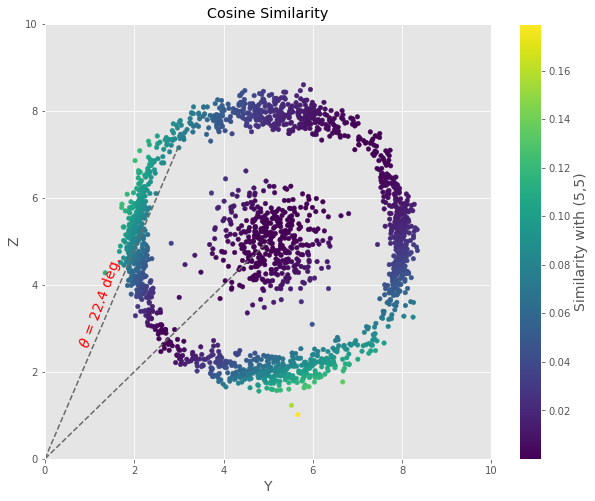

In [17]:
figCosine = plt.figure(figsize=[10,8])

plt.scatter(df.Y, df.Z, c=simCosine[:,0], s=20)
plt.plot([0,5],[0,5], '--', color='dimgray')
plt.plot([0,3],[0,7.2], '--', color='dimgray')
plt.text(0.7,2.6,r'$\theta$ = 22.4 deg.', rotation=70, size=14, color='red')
plt.ylim([0,10])
plt.xlim([0,10])
plt.xlabel('Y', size=14)
plt.ylabel('Z', size=14)
plt.title('Cosine Similarity')
cb = plt.colorbar()
cb.set_label('Similarity with (5,5)', size=14)

#figCosine.savefig('similarity-cosine.png')

Now, let's plot the 3D matrix with the similarity and the reference plane, (5,5,5).

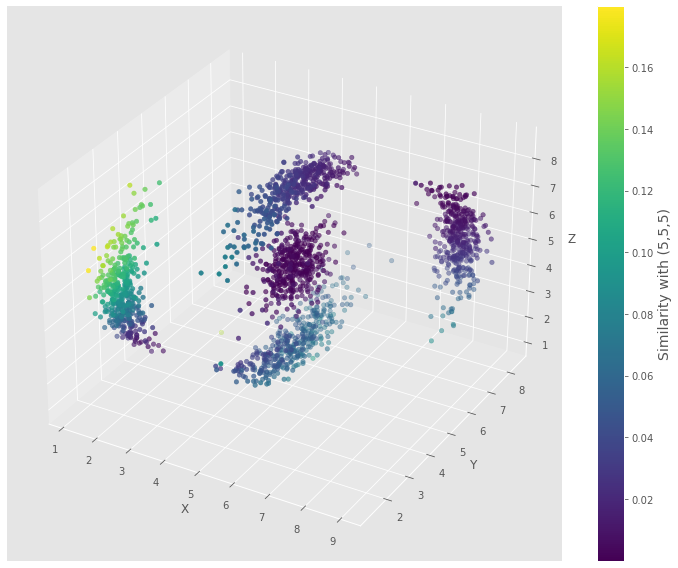

In [18]:
from mpl_toolkits.mplot3d import Axes3D
figCosine3D = plt.figure(figsize=(10, 8))
ax = figCosine3D.add_subplot(111, projection='3d')

p = ax.scatter(mat[:,0], mat[:,1], mat[:,2], c=simCosine3D[:,0])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
cb = figCosine3D.colorbar(p)
cb.set_label('Similarity with (5,5,5)', size=14)
                                   
figCosine3D.tight_layout()
#figCosine3D.savefig('cosine-3D.png', dpi=300, transparent=True)

----

### Cosine Similarity with text data
This is a quick example of how we can use Cosine Similarity to compare different text values or names for record matching or other natural language processing needs. 
First, we use count vectorizer to create a vector for each unique word in our Document 0 and Document 1. 

In [20]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
Document1 = "Starbucks Coffee"
Document2 = "Essence of Coffee"

corpus = [Document1,Document2]

X_train_counts = count_vect.fit_transform(corpus)

pd.DataFrame(X_train_counts.toarray(),columns=count_vect.get_feature_names(),index=['Document 0','Document 1'])

C:\Users\moham\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,coffee,essence,of,starbucks
Document 0,1,0,0,1
Document 1,1,1,1,0


Now, we use a common frequency tool called TF-IDF to convert the vectors to unique measures.

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
trsfm=vectorizer.fit_transform(corpus)
pd.DataFrame(trsfm.toarray(),columns=vectorizer.get_feature_names(),index=['Document 0','Document 1'])

C:\Users\moham\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,coffee,essence,of,starbucks
Document 0,0.579739,0.000000,0.000000,0.814802
Document 1,0.449436,0.631667,0.631667,0.000000


Here, we finally apply the __Cosine Similarity__ measure to calculate how similar Document 0 is compared to any other document in the corpus. Therefore, the first value of 1 is showing that the Document 0 is 100% similar to Document 0 and 0.26055576 is the similarity measure between Document 0 and Document 1.

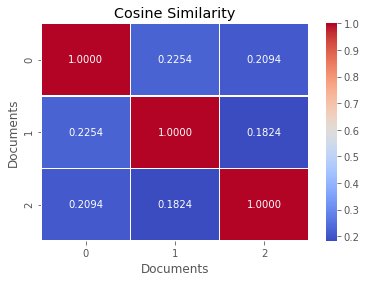

In [28]:
cos_sim = cosine_similarity(trsfm, trsfm, dense_output=False)
cos_sim_df = pd.DataFrame(cos_sim.toarray())

#let's plot cosine_similarity Matrix:
sns.heatmap(cos_sim_df, linewidths=.4, annot=True, fmt=".4f", cmap="coolwarm")
plt.xlabel('Documents')
plt.ylabel('Documents')
plt.title('Cosine Similarity');

In [22]:
count_vect = CountVectorizer()
Document1 = "Mr. X became president after winning the political election. Though he lost the support of some friends, X is friends with President Y"
Document2 = "X  says Y had no political interference in the election. X claimed Y is a friend who had nothing to do with the election"
Document3 = "Post elections, Y became President of Country Z. Y had served as the Prime Minister earlier in his political career"


corpus = [Document1,Document2,Document3]

In [23]:

X_train_counts = count_vect.fit_transform(corpus)

In [24]:
# Convert Sparse Matrix to Pandas Dataframe, to see the word frequencies:
df = pd.DataFrame(X_train_counts.toarray(),
                  columns=count_vect.get_feature_names(),
                  index=['Document 0','Document 1','Document 2'])

pd.options.display.max_columns = None
pd.options.display.max_rows = None
df

C:\Users\moham\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,after,as,became,career,claimed,country,do,earlier,election,elections,friend,friends,had,he,his,in,interference,is,lost,minister,mr,no,nothing,of,political,post,president,prime,says,served,some,support,the,though,to,who,winning,with
Document 0,1,0,1,0,0,0,0,0,1,0,0,2,0,1,0,0,0,1,1,0,1,0,0,1,1,0,2,0,0,0,1,1,2,1,0,0,1,1
Document 1,0,0,0,0,1,0,1,0,2,0,1,0,2,0,0,1,1,1,0,0,0,1,1,0,1,0,0,0,1,0,0,0,2,0,1,1,0,1
Document 2,0,1,1,1,0,1,0,1,0,1,0,0,1,0,1,1,0,0,0,1,0,0,0,1,1,1,1,1,0,1,0,0,1,0,0,0,0,0


In [29]:
vectorizer = TfidfVectorizer()
trsfm=vectorizer.fit_transform(corpus)
pd.DataFrame(trsfm.toarray(),
             columns=vectorizer.get_feature_names(),
             index=['Document 0','Document 1','Document 2'])

C:\Users\moham\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,after,as,became,career,claimed,country,do,earlier,election,elections,friend,friends,had,he,his,in,interference,is,lost,minister,mr,no,nothing,of,political,post,president,prime,says,served,some,support,the,though,to,who,winning,with
Document 0,0.22972,0.000000,0.174708,0.000000,0.000000,0.000000,0.000000,0.000000,0.174708,0.000000,0.000000,0.45944,0.000000,0.22972,0.000000,0.000000,0.000000,0.174708,0.22972,0.000000,0.22972,0.000000,0.000000,0.174708,0.135676,0.000000,0.349416,0.000000,0.000000,0.000000,0.22972,0.22972,0.271352,0.22972,0.000000,0.000000,0.22972,0.174708
Document 1,0.00000,0.000000,0.000000,0.000000,0.241779,0.000000,0.241779,0.000000,0.367759,0.000000,0.241779,0.00000,0.367759,0.00000,0.000000,0.183879,0.241779,0.183879,0.00000,0.000000,0.00000,0.241779,0.241779,0.000000,0.142799,0.000000,0.000000,0.000000,0.241779,0.000000,0.00000,0.00000,0.285597,0.00000,0.241779,0.241779,0.00000,0.183879
Document 2,0.00000,0.271266,0.206305,0.271266,0.000000,0.271266,0.000000,0.271266,0.000000,0.271266,0.000000,0.00000,0.206305,0.00000,0.271266,0.206305,0.000000,0.000000,0.00000,0.271266,0.00000,0.000000,0.000000,0.206305,0.160214,0.271266,0.206305,0.271266,0.000000,0.271266,0.00000,0.00000,0.160214,0.00000,0.000000,0.000000,0.00000,0.000000


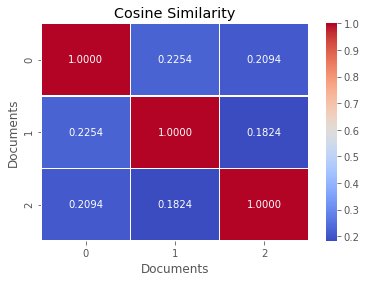

In [30]:
cos_sim = cosine_similarity(trsfm, trsfm,dense_output=False)
cos_sim_df = pd.DataFrame(cos_sim.toarray())

#let's plot cosine_similarity Matrix:
sns.heatmap(cos_sim_df, linewidths=.4, annot=True, fmt=".4f", cmap="coolwarm")
plt.xlabel('Documents')
plt.ylabel('Documents')
plt.title('Cosine Similarity');